# Slime Chunks

Slime chunks are randomly-designated chunks in a Minecraft world that allow slimes to spawn below a certain Y level regardless of the light level.

## Slime Chunk Info

- Approximately 10% of all chunks in a world are recognized as slime chunks.
- Slimes spawn at Y level 40 and below (highest full block = 38)
- Light level does not inhibit spawning

In [1]:
%load_ext cython

In [84]:
%%cython
import cython
from javarand import Random

# Determine if a chunk is a slime chunk given the world seed and chunk position
def is_slime_chunk(world_seed: cython.longlong, chunk_x: cython.int, chunk_z: cython.int) -> cython.bint:
    rand: Random
    rand = Random(0x3ad8025f ^ (
        world_seed
        + (chunk_x*chunk_x*0x4c1906 + chunk_x*0x5ac0db)
        + (chunk_z*chunk_z*0x4307a7 + chunk_z*0x5f24f)
    ))
    return rand.nextIntBounded(10) == 0

In [100]:
world_seed = 0
chunk_x = -2
chunk_z = -0

is_slime_chunk(world_seed, chunk_x, chunk_z)

True

## Example

The following example plots the slime chunks for the given world seed

In [105]:
import matplotlib.pyplot as plt
import numpy as np

In [106]:
world_seed = 0
chunk_x_range = np.arange(-10, 10)
chunk_z_range = np.arange(-10, 10)

# Create 2D boolean array indicating slime chunks
chunks = np.empty((len(chunk_x_range), len(chunk_z_range)), dtype=np.bool)
for i, chunk_z in enumerate(chunk_z_range):
    for j, chunk_x in enumerate(chunk_x_range):
        chunks[i][j] = is_slime_chunk(world_seed, chunk_x, chunk_z)

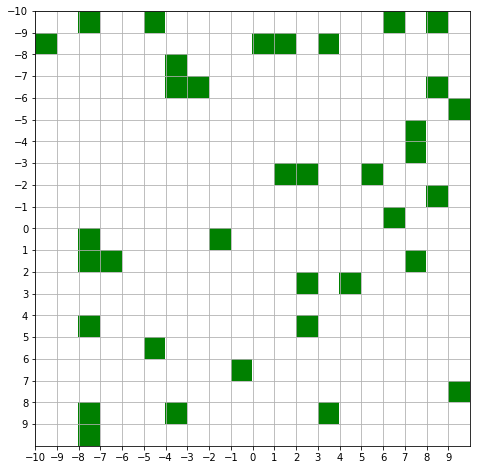

In [107]:
fig, ax = plt.subplots(figsize=(8,8))

extent = [chunk_x_range[0], chunk_x_range[-1]+1, chunk_z_range[-1]+1, chunk_z_range[0]]
color_map = colors.ListedColormap(['white', 'green'])

ax.imshow(chunks, extent=extent, cmap=color_map)
ax.grid()
ax.set_xticks(chunk_x_range)
ax.set_yticks(chunk_z_range)
plt.show()